In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3  4  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

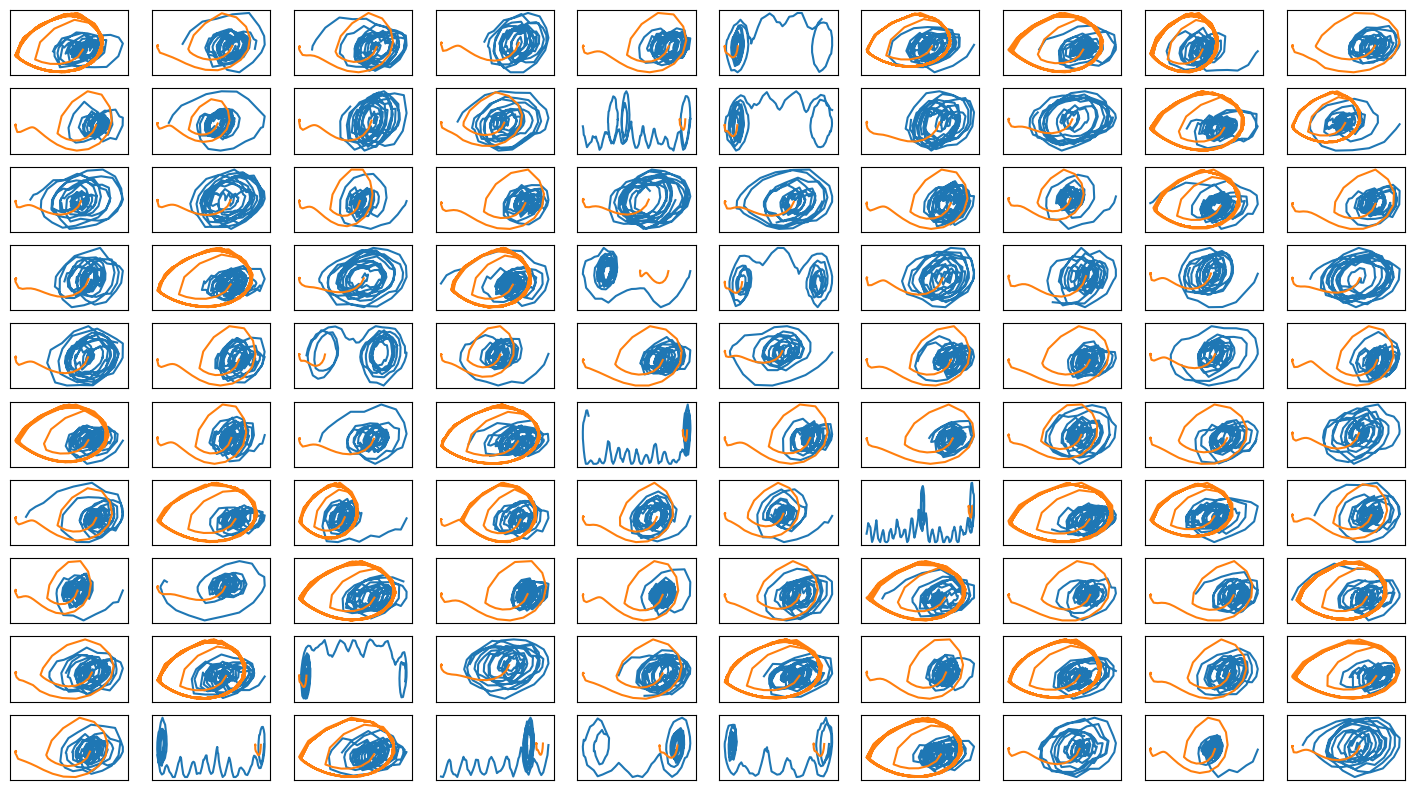

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

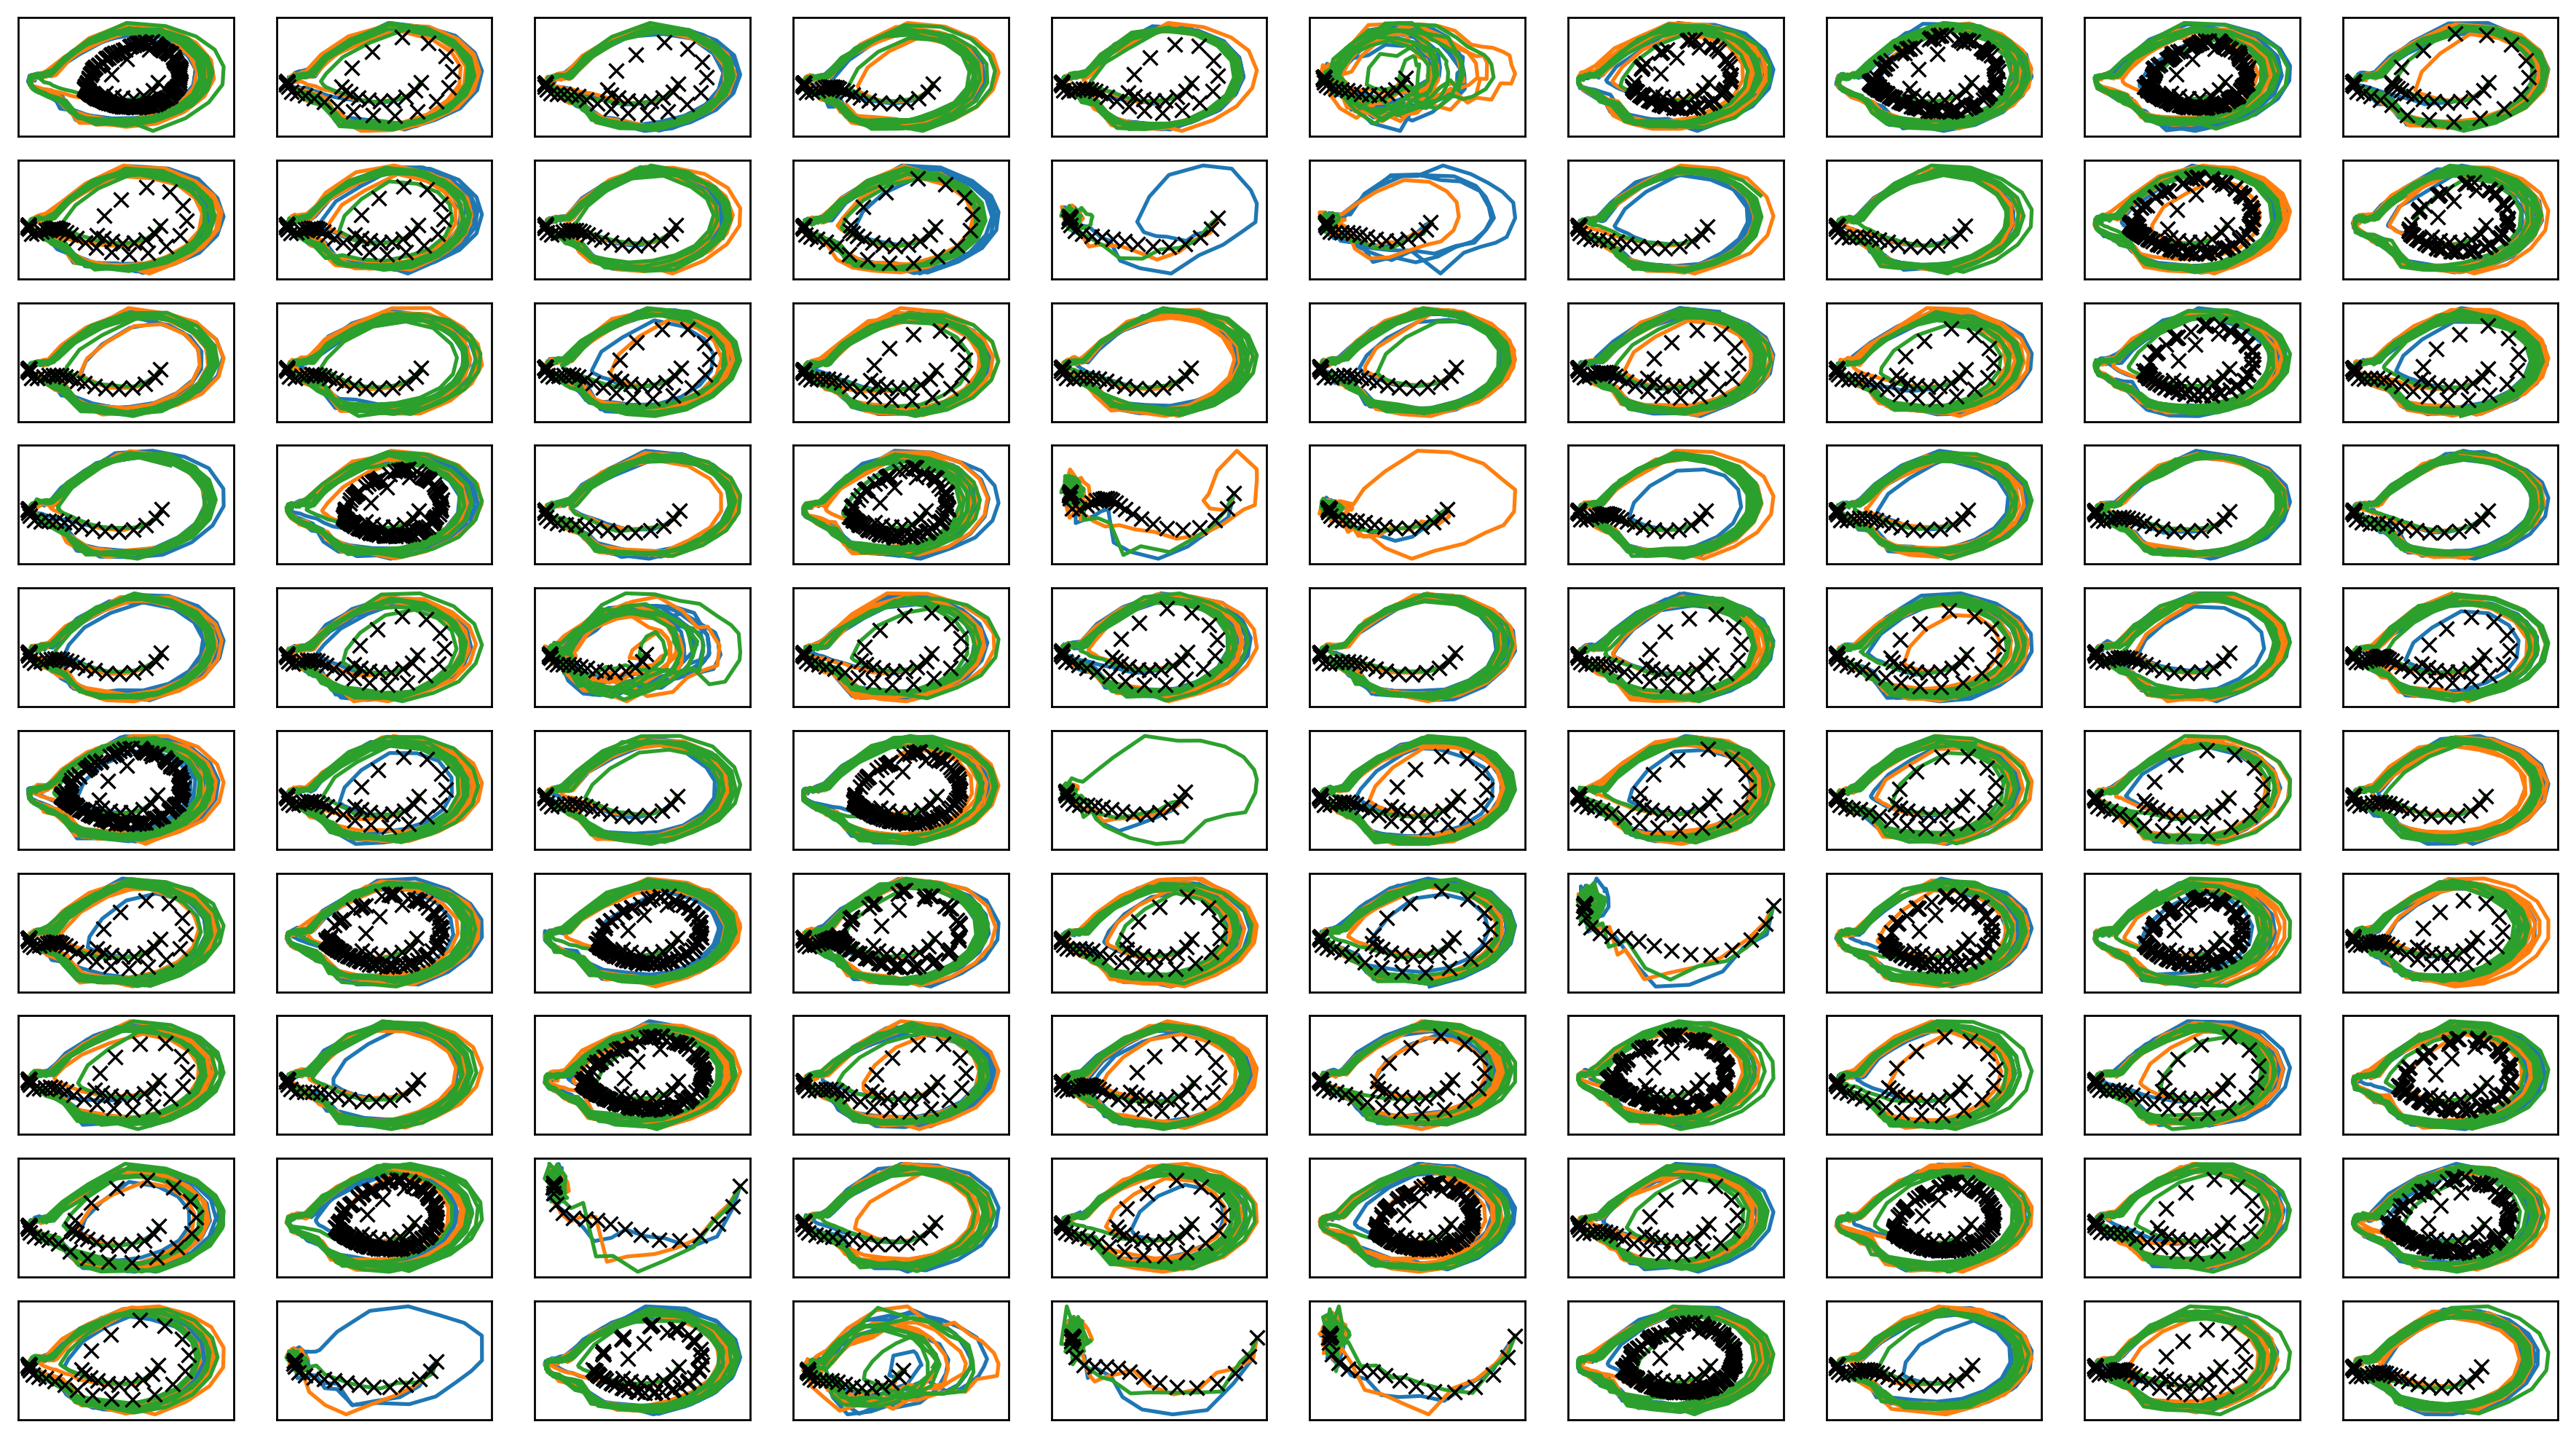

In [11]:
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

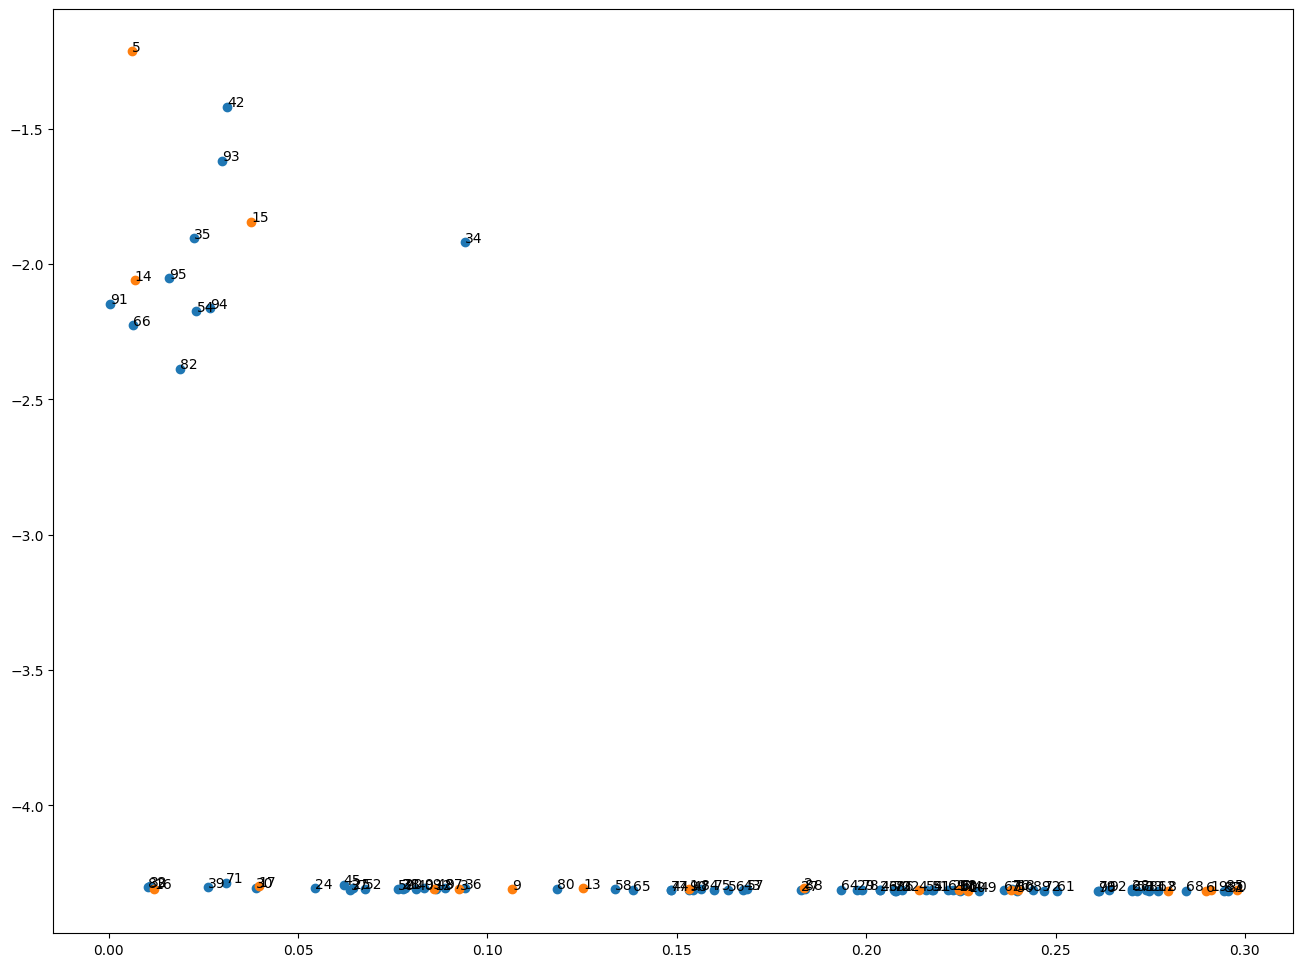

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


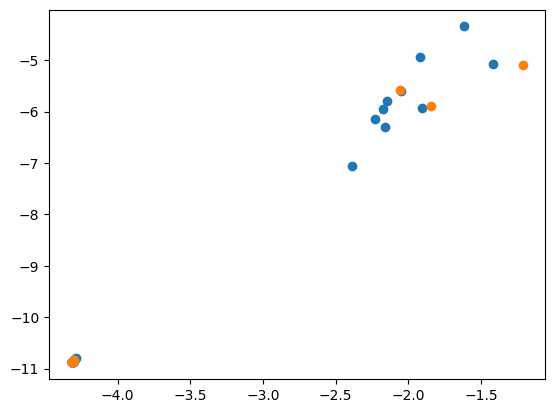

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-20 22:49:23.515662


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 8.85963  validloss 9.03494±0.00000  bestvalidloss 9.03494  last_update 0
train: iter 1  trainloss 8.05833  validloss 8.21423±0.00000  bestvalidloss 8.21423  last_update 0
train: iter 2  trainloss 7.39156  validloss 7.48569±0.00000  bestvalidloss 7.48569  last_update 0
train: iter 3  trainloss 6.82062  validloss 6.89932±0.00000  bestvalidloss 6.89932  last_update 0
train: iter 4  trainloss 6.31345  validloss 6.38582±0.00000  bestvalidloss 6.38582  last_update 0
train: iter 5  trainloss 5.88866  validloss 5.92437±0.00000  bestvalidloss 5.92437  last_update 0
train: iter 6  trainloss 5.51198  validloss 5.54372±0.00000  bestvalidloss 5.54372  last_update 0
train: iter 7  trainloss 5.18064  validloss 5.20826±0.00000  bestvalidloss 5.20826  last_update 0
train: iter 8  trainloss 4.88683  validloss 4.90076±0.00000  bestvalidloss 4.90076  last_update 0
train: iter 9  trainloss 4.62380  validloss 4.63387±0.00000  bestvalidloss 4.63387  last_update 0
train: iter 10  trai

train: iter 90  trainloss 1.20735  validloss 1.36952±0.00000  bestvalidloss 1.34950  last_update 3
train: iter 91  trainloss 1.18995  validloss 1.37090±0.00000  bestvalidloss 1.34950  last_update 4
train: iter 92  trainloss 1.18150  validloss 1.35594±0.00000  bestvalidloss 1.34950  last_update 5
train: iter 93  trainloss 1.19090  validloss 1.34685±0.00000  bestvalidloss 1.34685  last_update 0
train: iter 94  trainloss 1.19341  validloss 1.36224±0.00000  bestvalidloss 1.34685  last_update 1
train: iter 95  trainloss 1.18722  validloss 1.36752±0.00000  bestvalidloss 1.34685  last_update 2
train: iter 96  trainloss 1.18255  validloss 1.37652±0.00000  bestvalidloss 1.34685  last_update 3
train: iter 97  trainloss 1.20122  validloss 1.37561±0.00000  bestvalidloss 1.34685  last_update 4
train: iter 98  trainloss 1.17671  validloss 1.36937±0.00000  bestvalidloss 1.34685  last_update 5
train: iter 99  trainloss 1.18682  validloss 1.34770±0.00000  bestvalidloss 1.34685  last_update 6
train: ite

train: iter 178  trainloss 1.14937  validloss 1.41977±0.00000  bestvalidloss 1.34574  last_update 52
train: iter 179  trainloss 1.15179  validloss 1.41596±0.00000  bestvalidloss 1.34574  last_update 53
train: iter 180  trainloss 1.16245  validloss 1.43353±0.00000  bestvalidloss 1.34574  last_update 54
train: iter 181  trainloss 1.16840  validloss 1.38726±0.00000  bestvalidloss 1.34574  last_update 55
train: iter 182  trainloss 1.17477  validloss 1.42129±0.00000  bestvalidloss 1.34574  last_update 56
train: iter 183  trainloss 1.14495  validloss 1.41297±0.00000  bestvalidloss 1.34574  last_update 57
train: iter 184  trainloss 1.17237  validloss 1.40084±0.00000  bestvalidloss 1.34574  last_update 58
train: iter 185  trainloss 1.14942  validloss 1.41594±0.00000  bestvalidloss 1.34574  last_update 59
train: iter 186  trainloss 1.15950  validloss 1.38550±0.00000  bestvalidloss 1.34574  last_update 60
train: iter 187  trainloss 1.15449  validloss 1.38923±0.00000  bestvalidloss 1.34574  last_

In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([-4.0222, -0.5181], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_list_for_mixture_of_gaussian_belief)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])

In [19]:
print(simdata1[0].shape)

(200, 4)


In [20]:
vi.get_belief()

tensor([-4.0222, -0.5181])

In [21]:
print(vi.reset())
print(vi.sim_z)

[ 3.2956574  -0.33874005 -4.0222287  -0.5181145 ]
tensor([-3.4542])


In [22]:
vi.get_belief()

tensor([-4.0222, -0.5181])

In [23]:
tmp_simdata = 1 * simdata1[0]
ds = tmp_simdata[1:,:vi.s_dim] - tmp_simdata[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_simdata[:-1,:vi.s_dim+vi.a_dim], ds])
vi.get_belief(sads_array)

hishi tensor([-0.1394, -1.2245]) tensor([-0.1429, -1.5490, -8.0000, -6.9141], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1414, -1.5123, -8.0000, -7.0853], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1459, -1.6242, -8.0000, -5.6092], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.0753, -0.4623, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1455, -1.6057, -8.0000, -6.6471], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1275, -1.2470, -6.6383, -2.0105], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1428, -1.4518, -7.5178, -4.0011], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1458, -1.6224, -8.0000, -5.5927], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1466, -1.6344, -8.0000, -6.1718], grad_fn=<SelectBackward0>)
hishi tensor([-0.1394, -1.2245]) tensor([-0.1442, -1.53

tensor([-3.9982, -0.5453])

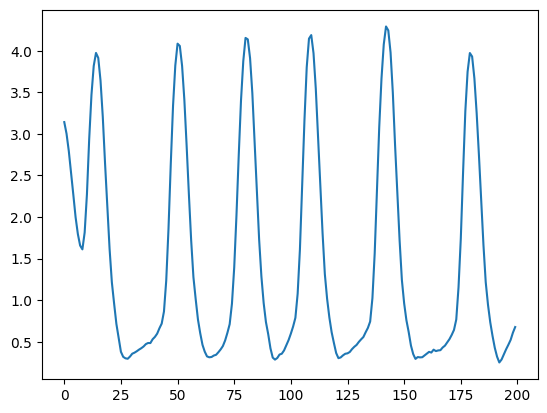

In [24]:
plt.plot(tmp_simdata[:,0])

In [25]:
tmp_simdata = 1 * simdata1[1]
ds = tmp_simdata[1:,:vi.s_dim] - tmp_simdata[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_simdata[:-1,:vi.sa_dim], ds])
vi.get_belief(sads_array)

hishi tensor([-0.1196, -1.1601]) tensor([-0.1422, -1.4179, -7.3811, -3.6850], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1026, -0.9439, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1395, -1.4685, -8.0000, -7.2898], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1409, -1.3787, -7.2270, -3.3282], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1341, -1.3824, -8.0000, -7.5379], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1389, -1.4537, -8.0000, -7.3554], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1447, -1.5595, -7.9522, -5.0055], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.1468, -1.6359, -8.0000, -6.3032], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.0871, -0.6744, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1196, -1.1601]) tensor([-0.0744, -0.43

tensor([-3.9838, -0.5594])

In [26]:
tmp_simdata = 1 * simdata1[5]
ds = tmp_simdata[1:,:vi.s_dim] - tmp_simdata[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_simdata[:-1,:vi.s_dim+vi.a_dim], ds])
vi.get_belief(sads_array)

hishi tensor([-0.0791, -0.9739]) tensor([-0.1386, -1.4459, -8.0000, -7.3850], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1142, -1.1062, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1460, -1.6264, -8.0000, -5.6793], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1460, -1.6267, -8.0000, -5.6905], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.0904, -0.7334, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.0938, -0.7962, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1435, -1.4936, -7.6864, -4.3909], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.0989, -0.8907, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1424, -1.4321, -7.4384, -3.8175], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1279, -1.29

hishi tensor([-0.0791, -0.9739]) tensor([-0.1452, -1.5859, -8.0000, -5.2516], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1469, -1.6372, -8.0000, -6.4152], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1444, -1.5411, -7.8783, -4.8345], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1082, -1.0224, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1449, -1.5931, -8.0000, -6.7068], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1466, -1.6345, -8.0000, -6.1823], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1463, -1.6316, -8.0000, -5.9285], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1462, -1.6299, -8.0000, -5.8083], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1039, -0.9616, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.0791, -0.9739]) tensor([-0.1426, -1.54

tensor([-3.8933, -0.6140])

In [27]:
tmp_simdata = 1 * simdata1[4]
ds = tmp_simdata[1:,:vi.s_dim] - tmp_simdata[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_simdata[:-1,:vi.s_dim+vi.a_dim], ds])
vi.get_belief(sads_array)

hishi tensor([-0.1255, -1.1878]) tensor([-0.0694, -0.3147, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1067, -1.0010, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1464, -1.6319, -8.0000, -5.9560], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1298, -1.3240, -8.0000, -7.6672], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1080, -1.0194, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1450, -1.5747, -8.0000, -5.1480], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1453, -1.5905, -8.0000, -5.2952], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1415, -1.5162, -8.0000, -7.0671], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.0809, -0.5772, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1450, -1.57

hishi tensor([-0.1255, -1.1878]) tensor([-0.1459, -1.6255, -8.0000, -5.6442], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.0758, -0.4754, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1367, -1.4170, -8.0000, -7.4613], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1446, -1.5533, -7.9272, -4.9477], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.0758, -0.4750, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1456, -1.6089, -8.0000, -6.6321], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1000, -0.9068, -8.0000, -8.0000], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1285, -1.3058, -8.0000, -7.7076], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1467, -1.6357, -8.0000, -6.2808], grad_fn=<SelectBackward0>)
hishi tensor([-0.1255, -1.1878]) tensor([-0.1120, -1.07

tensor([-3.8702, -0.6354])